In [95]:
# I lost my old code, time to write it again. This time in python, hopefully better.
import scipy as sp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

def create_piecewise_approximator(f, df, m0 = 1, b0 = 0, iter = 8):
    m = [m0]; b = [b0]; c = [0]
    #get d vals:
    x0 = 0.01 # starting iteration point; set to past d
    m_prev = m0
    m_next = .5*m_prev
    b_prev = b0
    for i in range(iter):
        def df_zero(x):
            return df(x) - m_next
        d = fsolve(df_zero, x0)[0]
        left_side = f(d) - m_next*d - 2*b_prev
        def f_zero(x):
            return (2*m_prev - m_next)*x - f(x) - left_side
        c_next = fsolve(f_zero, x0)[0]
        if(c_next > x0 and c_next < d):
            c.append(c_next)
            m.append(m_next)
            b_next = (m_prev - m_next)*c_next + b_prev
            b.append(b_next)
            m_prev = m_next; b_prev = b_next
        m_next = .5*m_next
        x0 = d
    return m, b, c

class piecewise_approximator:
    
    def __init__(self, m, b, c, g = lambda x: -1*x, asmp = 1):
        self.g = g
        self.m = m
        self.b = b
        self.c = c
        self.asmp = asmp
    
    def f(self, x):
        x_abs = x
        if(x_abs < 0):
            x_abs *= -1
        index = -1
        for i in self.c:
            if x_abs > i:
                index += 1
        y = self.m[index]*x_abs + self.b[index]
        if(y > self.asmp):
            y = self.asmp
        if(x < 0):
            y = self.g(y)
        return y

def plot_piecewise_approximator(f_, x_max = 16, y_min = 0, y_max = 1, plot_neg = False):
    x_min = 0
    if(plot_neg):
        x_min = -1*x_max
    num = 1000
    x = np.linspace(x_min, x_max, num)
    y = np.array([f_.f(x_) for x_ in x])
    plt.figure(figsize = (15, 4))
    plt.plot(x, y, color = 'k')
    plt.show()

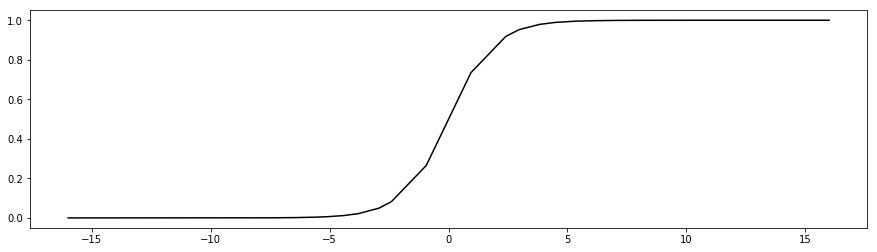

In [88]:
#sigmoid function
from math import exp
f = lambda x: 1/(1 + exp(-1*x))
df = lambda x: exp(-1*x)/(1+exp(-1*x))**2

m, b, c = create_piecewise_approximator(f, df, m0=.25, b0=.5)
f_ = piecewise_approximator(m, b, c, g = lambda x: 1 - x, asmp = 1)
plot_piecewise_approximator(f_, y_max = 1.2, plot_neg = True)


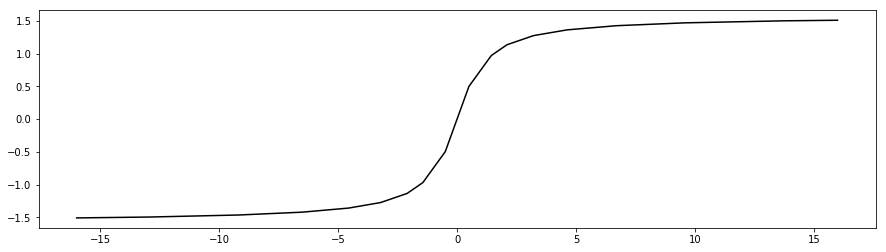

In [89]:
#arctan function
from math import atan, pi
f = atan
df = lambda x: 1/(1 + x**2)

m, b, c = create_piecewise_approximator(f, df, m0=1, b0=0, iter = 12)
f_ = piecewise_approximator(m, b, c, g = lambda x: -1*x, asmp = pi/2)
plot_piecewise_approximator(f_, y_min = -1*(pi/2 + .2),y_max = pi/2 + .2, plot_neg = True)

[1, 0.5, 0.125, 0.015625]


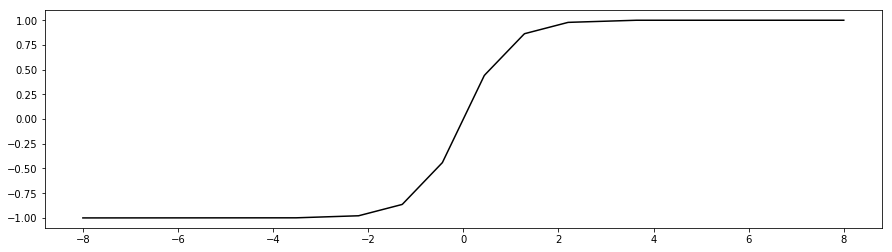

In [97]:
#tanh function
from numpy import tanh, cosh
f = tanh
df = lambda x: 1/cosh(2*x)

m, b, c = create_piecewise_approximator(f, df, m0=1, b0=0, iter = 8)
print(m) # notice that 0.25 is skipped in the slopes!
f_ = piecewise_approximator(m, b, c, g = lambda x: -1*x, asmp = 1)
plot_piecewise_approximator(f_, x_max = 8, y_min = -1.2 ,y_max = 1.2, plot_neg = True)

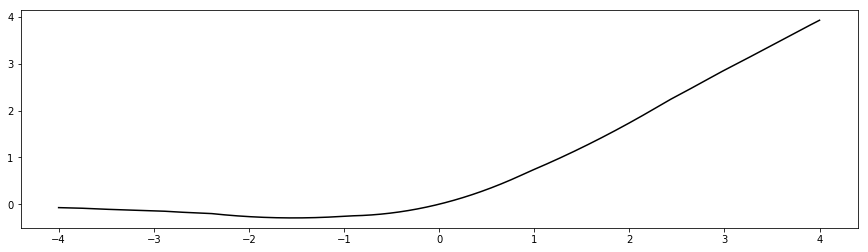

In [104]:
#swish function = sigmoid(x)*x
f = lambda x: 1/(1 + exp(-1*x))
df = lambda x: exp(-1*x)/(1+exp(-1*x))**2

m, b, c = create_piecewise_approximator(f, df, m0=.25, b0=.5)
f_ = piecewise_approximator(m, b, c, g = lambda x: 1 - x, asmp = 1)

class swish:
    def __init__(self, sigmoid):
        self.sigmoid = sigmoid
    def f(self, x):
        return self.sigmoid.f(x)*x
swish_ = swish(f_)
plot_piecewise_approximator(swish_, x_max = 4, y_min = -0.5 ,y_max = 4, plot_neg = True)